# Deep Learning Con Tensorflow

Tomado del curso [Deep Learning con Tensorflow para Machine Learning e IA](https://www.udemy.com/course/tensorflow-python/) del profesor [Juan Gabriel Gomila Salas](https://github.com/joanby/tensorflow).

## Operaciones en el grafo de computación

In [1]:
import tensorflow as tf
session = tf.Session()

In [2]:
import numpy as np

In [4]:
x_vals = np.array([2.,4.,6.,8.,10.,12.])

In [6]:
x_data = tf.placeholder(tf.float32)

In [8]:
m_const = tf.constant(3.)

$$ y = mx = 3x $$

In [10]:
my_product = tf.multiply(m_const, x_data)
my_product

<tf.Tensor 'Mul_1:0' shape=<unknown> dtype=float32>

In [12]:
for x_val in x_vals:
    print(session.run(my_product, feed_dict = {x_data: x_val}))

6.0
12.0
18.0
24.0
30.0
36.0


In [13]:
print(session.run(my_product, feed_dict = {x_data: x_vals}))

[ 6. 12. 18. 24. 30. 36.]


In [14]:
session.run(tf.multiply(m_const, x_vals))

array([ 6., 12., 18., 24., 30., 36.], dtype=float32)

## Operaciones por capas

In [17]:
import tensorflow as tf
session = tf.Session()

In [18]:
import numpy as np

In [20]:
my_array = np.array([[1.,3.,5.,7.],
                    [-2.,0.,7.,6.],
                    [-6.,-1.,0.,3.]])
my_array

array([[ 1.,  3.,  5.,  7.],
       [-2.,  0.,  7.,  6.],
       [-6., -1.,  0.,  3.]])

In [21]:
x_vals = np.array([my_array, my_array+1])
x_vals

array([[[ 1.,  3.,  5.,  7.],
        [-2.,  0.,  7.,  6.],
        [-6., -1.,  0.,  3.]],

       [[ 2.,  4.,  6.,  8.],
        [-1.,  1.,  8.,  7.],
        [-5.,  0.,  1.,  4.]]])

In [29]:
x_data = tf.placeholder(tf.float32, shape=(3,None))

In [25]:
m1 = tf.constant([[1.],[0.],[-2.],[5.]])
m2 = tf.constant([[7.]])
a1 = tf.constant([[15.]])

$$(X\cdot m_1)m_2+a_1$$

In [31]:
prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

In [32]:
for x_val in x_vals:
    print(session.run(add1, feed_dict={x_data: x_val}))

[[197.]
 [113.]
 [ 78.]]
[[225.]
 [141.]
 [106.]]


## Trabajar con múltiples capas

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.InteractiveSession()
# session = tf.Session()

C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [47]:
x_shape = [1,4,4,1]
x_val = np.random.uniform(size = x_shape)
x_val

array([[[[0.06128026],
         [0.87156032],
         [0.72401941],
         [0.60112092]],

        [[0.8891606 ],
         [0.28728361],
         [0.83489501],
         [0.40807198]],

        [[0.7320763 ],
         [0.75241017],
         [0.79797285],
         [0.77101396]],

        [[0.76440585],
         [0.00251679],
         [0.54689621],
         [0.13860781]]]])

In [48]:
x_data = tf.placeholder(tf.float32, shape = x_shape)

In [49]:
my_filter = tf.constant(0.25, shape = [2,2,1,1])
my_strides = [1,2,2,1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter,my_strides, padding='SAME', name='Moving_Average_Wnd')

$$\frac{W-F+2P}{S}+1$$

- W : dimensión de entrada
- F: Dimensión del filtro
- P: Padding
- S: Stride

In [50]:
def custom_layer(input_matrix):
    input_matrix_squeezed  =tf.squeeze(input_matrix)
    A = tf.constant([[1.,2.],[3.,4.]])
    b = tf.constant(1., shape=[2,2])
    temp1 = tf.matmul(A, input_matrix_squeezed)
    temp2 = tf.add(temp1, b)
    return tf.sigmoid(temp2)

In [51]:
with tf.name_scope("Custom_layer") as scope:
    customlayer1 = custom_layer(mov_avg_layer) 

In [52]:
session.run(customlayer1, feed_dict={x_data: x_val})

array([[0.9341972 , 0.94099253],
       [0.9921033 , 0.9944067 ]], dtype=float32)

### Tensorboard

In [53]:
writer = tf.summary.FileWriter('multiple-layes', session.graph)
session.run(customlayer1, feed_dict={x_data: x_val})
writer.close()

## Funciones de pérdida en predicción

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
session = tf.Session()

In [29]:
x_vals = tf.linspace(-1.,1.,500)
target = tf.constant(0.)

### Norma L2 (distancia Euclidiana)

$$L2(y_r, y_p) = \sqrt{\sum(y_r-y_p)^2}$$

In [42]:
l2_y_vals = tf.square(target-x_vals)
l2_y_out = session.run(l2_y_vals)

In [31]:
l2_y_vals = tf.sqrt(tf.reduce_sum(tf.square(target-x_vals)))
l2_y_out = session.run(l2_y_vals)
print((l2_y_out**2)/2)

83.66733226343104


In [32]:
session.run(tf.nn.l2_loss(target-x_vals))

83.667336

### Norma L1

$$L1(y_r,y_p)=|y_r-y_p|$$

In [33]:
l1_y_vals = tf.abs(target-x_vals)

In [34]:
l1_y_out = session.run(l1_y_vals)

In [73]:
print(l1_y_out)

[1.         0.995992   0.99198395 0.98797596 0.98396796 0.9799599
 0.9759519  0.9719439  0.96793586 0.96392787 0.9599198  0.9559118
 0.9519038  0.94789577 0.94388777 0.9398798  0.9358717  0.9318637
 0.92785573 0.9238477  0.9198397  0.9158317  0.91182363 0.90781564
 0.90380764 0.8997996  0.8957916  0.8917836  0.88777554 0.88376755
 0.87975955 0.8757515  0.8717435  0.8677355  0.86372745 0.85971946
 0.8557114  0.8517034  0.8476954  0.84368736 0.83967936 0.8356713
 0.8316633  0.8276553  0.82364726 0.81963927 0.8156313  0.8116232
 0.8076152  0.8036072  0.7995992  0.7955912  0.7915832  0.7875751
 0.78356713 0.77955914 0.7755511  0.7715431  0.7675351  0.76352704
 0.75951904 0.75551105 0.751503   0.747495   0.743487   0.73947895
 0.73547095 0.73146296 0.7274549  0.72344685 0.7194389  0.71543086
 0.7114228  0.70741487 0.7034068  0.69939876 0.6953908  0.69138277
 0.6873747  0.6833667  0.6793587  0.67535067 0.6713427  0.6673347
 0.6633266  0.6593186  0.65531063 0.6513026  0.6472946  0.6432866
 0.

### Pseudo-Huber

$$PH(y_r,y_p) = \delta^2 \cdot \sqrt{1+\left(\frac{y_r-y_p}{\delta}\right)^2}-1, \delta > 0$$

In [49]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1.+tf.square((target-x_vals)/delta1))-1.)

In [50]:
phuber1_y_out = session.run(phuber1_y_vals)
print(phuber1_y_out)

[1.95194095e-01 1.94222122e-01 1.93250388e-01 1.92278922e-01
 1.91307634e-01 1.90336585e-01 1.89365774e-01 1.88395262e-01
 1.87424958e-01 1.86454892e-01 1.85485139e-01 1.84515625e-01
 1.83546349e-01 1.82577342e-01 1.81608602e-01 1.80640161e-01
 1.79671928e-01 1.78704023e-01 1.77736357e-01 1.76769003e-01
 1.75801963e-01 1.74835175e-01 1.73868656e-01 1.72902465e-01
 1.71936601e-01 1.70970991e-01 1.70005724e-01 1.69040769e-01
 1.68076113e-01 1.67111784e-01 1.66147754e-01 1.65184096e-01
 1.64220735e-01 1.63257748e-01 1.62295029e-01 1.61332756e-01
 1.60370767e-01 1.59409150e-01 1.58447891e-01 1.57486990e-01
 1.56526446e-01 1.55566275e-01 1.54606521e-01 1.53647125e-01
 1.52688131e-01 1.51729509e-01 1.50771290e-01 1.49813473e-01
 1.48856103e-01 1.47899121e-01 1.46942526e-01 1.45986423e-01
 1.45030722e-01 1.44075468e-01 1.43120602e-01 1.42166257e-01
 1.41212344e-01 1.40258908e-01 1.39305934e-01 1.38353407e-01
 1.37401402e-01 1.36449888e-01 1.35498852e-01 1.34548336e-01
 1.33598328e-01 1.326488

## Funciones de pérdida para problemas de clasificación

In [4]:
import tensorflow as tf
import numpy as np
session = tf.Session()

In [53]:
x_vals = tf.linspace(-3.,5.,500)
target = tf.constant(1.)
targets = tf.fill([500,],1.)

### Hinge (función bisagra)

$$H(y_r,y_p)=max(0, 1-y_r\cdot y_p)$$

In [54]:
hinge_y_vals = tf.maximum(0., 1.0 - tf.multiply(target, x_vals))
hinge_y_out = session.run(hinge_y_vals)
print(hinge_y_out)

[4.         3.983968   3.9679358  3.9519038  3.9358718  3.9198396
 3.9038076  3.8877757  3.8717434  3.8557115  3.8396792  3.8236473
 3.8076153  3.791583   3.775551   3.759519   3.743487   3.727455
 3.711423   3.6953907  3.6793587  3.6633267  3.6472945  3.6312625
 3.6152306  3.5991983  3.5831664  3.5671344  3.5511022  3.5350702
 3.5190382  3.503006   3.486974   3.470942   3.4549098  3.4388778
 3.4228456  3.4068136  3.3907816  3.3747494  3.3587174  3.3426852
 3.3266532  3.3106213  3.294589   3.278557   3.262525   3.2464929
 3.230461   3.214429   3.1983967  3.1823647  3.1663327  3.1503005
 3.1342685  3.1182365  3.1022043  3.0861723  3.0701404  3.0541081
 3.0380762  3.0220442  3.006012   2.98998    2.973948   2.9579158
 2.9418838  2.9258518  2.9098196  2.8937874  2.8777556  2.8617234
 2.8456912  2.8296595  2.8136272  2.797595   2.7815633  2.765531
 2.7494988  2.7334669  2.717435   2.7014027  2.6853707  2.6693387
 2.6533065  2.6372745  2.6212425  2.6052103  2.5891783  2.5731463
 2.5571141  

### Entropía cruzada (función logística)

$$H(y_r,y_p) = -y_r\cdot log(y_p) - (1-y_r)\cdot log(1-y_p)$$

In [56]:
xentr_y_vals = -tf.multiply(target, tf.log(x_vals)) - tf.multiply((1.-target), tf.log(1.-x_vals))
xentr_y_out = session.run(xentr_y_vals)
print(xentr_y_out)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

### Entropía cruzada de sigmoide (evitar nans)

$$H(y_r,y_p) = -y_r\cdot log\left(\frac{1}{1+e^{-y_p}}\right) - (1-y_r)\cdot log\left(1-\frac{1}{1+e^{-y_p}}\right)$$

In [58]:
xentr_sig_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels = targets)
xentr_sig_y_out = session.run(xentr_sig_y_vals)
print(xentr_sig_y_out)

[3.0485873  3.0333216  3.0180674  3.0028253  2.9875953  2.9723773
 2.9571722  2.9419796  2.9267998  2.9116333  2.8964796  2.8813396
 2.866213   2.8511002  2.8360016  2.8209174  2.805847   2.7907915
 2.7757509  2.7607253  2.7457147  2.7307198  2.7157404  2.700777
 2.6858296  2.6708984  2.6559842  2.6410863  2.6262057  2.6113422
 2.5964963  2.581668   2.5668578  2.5520658  2.5372922  2.5225375
 2.5078013  2.493085   2.4783878  2.4637103  2.4490528  2.4344156
 2.419799   2.4052036  2.3906288  2.3760755  2.3615441  2.3470345
 2.332547   2.3180823  2.3036401  2.2892213  2.2748258  2.2604537
 2.246106   2.2317827  2.2174835  2.2032096  2.188961   2.174738
 2.1605408  2.14637    2.1322253  2.1181078  2.1040173  2.0899544
 2.0759194  2.0619125  2.0479343  2.0339847  2.0200646  2.006174
 1.9923133  1.978483   1.964683   1.9509143  1.9371768  1.923471
 1.9097973  1.8961561  1.8825476  1.8689723  1.8554305  1.8419226
 1.828449   1.8150101  1.8016063  1.7882378  1.7749051  1.7616086
 1.7483487  1.

In [61]:
pos_weight = tf.constant(0.5)
xentr_sig_w_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals, targets = targets, pos_weight = pos_weight)
xentr_sig_w_y_out = session.run(xentr_sig_w_y_vals)
print(xentr_sig_w_y_out)

[1.5242937  1.5166608  1.5090337  1.5014126  1.4937977  1.4861887
 1.4785861  1.4709898  1.4633999  1.4558166  1.4482398  1.4406698
 1.4331065  1.4255501  1.4180008  1.4104587  1.4029235  1.3953958
 1.3878754  1.3803626  1.3728573  1.3653599  1.3578702  1.3503885
 1.3429148  1.3354492  1.3279921  1.3205432  1.3131028  1.3056711
 1.2982482  1.290834   1.2834289  1.2760329  1.2686461  1.2612687
 1.2539006  1.2465425  1.2391939  1.2318552  1.2245264  1.2172078
 1.2098995  1.2026018  1.1953144  1.1880378  1.1807721  1.1735172
 1.1662735  1.1590412  1.1518201  1.1446106  1.1374129  1.1302269
 1.123053   1.1158913  1.1087418  1.1016048  1.0944805  1.087369
 1.0802704  1.073185   1.0661126  1.0590539  1.0520086  1.0449772
 1.0379597  1.0309563  1.0239671  1.0169923  1.0100323  1.003087
 0.99615663 0.9892415  0.9823415  0.97545713 0.9685884  0.9617355
 0.95489866 0.94807804 0.9412738  0.93448615 0.92771524 0.9209613
 0.9142245  0.90750504 0.90080315 0.8941189  0.88745254 0.8808043
 0.87417436 

### Softmax Cross Entropy (probabilidad)

$$SM(z_k) = \frac{e^{z_k}}{\sum_{i=1}^n e^{z_i}}$$

In [21]:
unscaled_logits = tf.constant([[1.,-3.,10.]])
target_dist = tf.constant([[0.1,0.02,0.88]])
softmax_xentr = tf.nn.softmax_cross_entropy_with_logits_v2(logits = unscaled_logits, labels = target_dist)
softmax_xentr_y_out = session.run(softmax_xentr)
print(softmax_xentr_y_out)

[1.1601256]


### Sparse softmax cross entropy (vector 0s y un 1)

In [ ]:
unscaled_logits = tf.constant([[1.,-3.,10.]])
target_dist = tf.constant([[2]])
softmax_xentr = tf.nn.softmax_cross_entropy_with_logits_v2(logits = unscaled_logits, labels = target_dist)
softmax_xentr_y_out = session.run(softmax_xentr)
print(softmax_xentr_y_out)

### Evaluar las funciones de pérdida

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### Para predicción

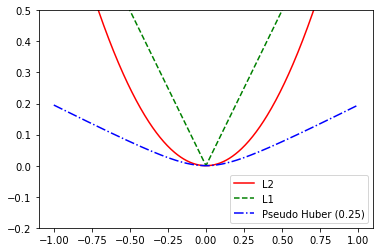

In [51]:
x_vals = tf.linspace(-1.,1.,500)
x_array = session.run(x_vals)
# print(x_vals.shape)
# print(l2_y_out.shape)
plt.plot(x_array, l2_y_out, 'r-', label='L2')
plt.plot(x_array, l1_y_out, 'g--', label='L1')
plt.plot(x_array, phuber1_y_out, 'b-.', label='Pseudo Huber (0.25)')
plt.ylim(-0.2, 0.5)
plt.legend(loc = 'lower right', prop={'size': 10})
plt.show()

#### Para clasificación

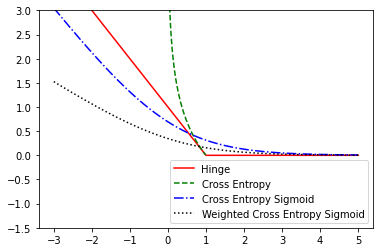

In [63]:
x_vals = tf.linspace(-3.,5.,500)
x_array = session.run(x_vals)

plt.plot(x_array, hinge_y_out, 'r-', label='Hinge')
plt.plot(x_array, xentr_y_out, 'g--', label='Cross Entropy')
plt.plot(x_array, xentr_sig_y_out, 'b-.', label='Cross Entropy Sigmoid')
plt.plot(x_array, xentr_sig_w_y_out, 'k:', label='Weighted Cross Entropy Sigmoid')
plt.ylim(-1.5, 3)
plt.legend(loc = 'lower right', prop={'size': 10})
plt.show()

# Propagación hacia atras

In [1]:
import numpy as np
import tensorflow as tf
session = tf.Session()

In [2]:
x_vals = np.random.normal(loc=1,scale=0.1, size = 200)
y_vals = np.repeat(10.,200)

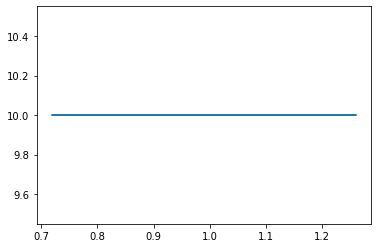

In [4]:
import matplotlib.pyplot as plt
plt.plot(x_vals, y_vals)

In [3]:
x_data = tf.placeholder(shape = [1], dtype = tf.float32)
y_target = tf.placeholder(shape = [1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

In [14]:
my_pred = tf.multiply(A, x_data)

In [15]:
loss = tf.square(my_pred - y_target)

In [16]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate = 0.025)
train_step = my_optim.minimize(loss)

In [17]:
init = tf.global_variables_initializer()
session.run(init)

In [19]:
for i in range(400):
    rand_index = np.random.choice(200)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%20==0:
       print("Paso #" +  str(i+1)+" A = "+str(session.run(A))+" Loss: "+str(session.run(loss, feed_dict={x_data:rand_x, y_target: rand_y}))) 

Paso #20 A = [9.518439] Loss: [0.00731951]
Paso #40 A = [9.812304] Loss: [0.8632056]
Paso #60 A = [9.881844] Loss: [0.00156336]
Paso #80 A = [10.047333] Loss: [0.28311694]
Paso #100 A = [9.938346] Loss: [0.42835653]
Paso #120 A = [9.580785] Loss: [2.8371282]
Paso #140 A = [9.713846] Loss: [0.00132155]
Paso #160 A = [10.049053] Loss: [0.62877524]
Paso #180 A = [9.962666] Loss: [1.3096243]
Paso #200 A = [10.013754] Loss: [0.70275766]
Paso #220 A = [9.848461] Loss: [0.18943284]
Paso #240 A = [10.15191] Loss: [0.2404111]
Paso #260 A = [9.848379] Loss: [0.02007072]
Paso #280 A = [9.889252] Loss: [1.4632394]
Paso #300 A = [9.957682] Loss: [0.5233712]
Paso #320 A = [9.876638] Loss: [1.826698]
Paso #340 A = [9.958791] Loss: [1.266681]
Paso #360 A = [9.855842] Loss: [0.04603089]
Paso #380 A = [9.915981] Loss: [0.9824046]
Paso #400 A = [10.189205] Loss: [0.6807018]


### Clasificación binarias

- $X_1\sim N(-2,1), X_2\sim N(3,1)$
- $target(x_1) = 0, target(X_2) = 1$
- $sigmoid(x+A) = \frac{1}{1+e^{-(x+A)}}$
- Determinar el valor de $A$
- Teoricamente $A\simeq \frac{m_1+m_2}{2}, m_1 = -2, m_2 = 3\simeq 0.5$

In [62]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [63]:
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(3,1,100)))
y_vals = np.concatenate((np.repeat(0., 100), np.repeat(1.,100)))

In [64]:
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [65]:
my_pred = tf.add(x_data, A)

In [66]:
my_pred_expanded = tf.expand_dims(my_pred,0)
y_target_expanded = tf.expand_dims(y_target,0)

In [67]:
init = tf.initialize_all_variables()
session.run(init)
print(session.run(A))

[9.887072]


In [68]:
xentr = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_pred_expanded, labels = y_target_expanded)

In [69]:
my_op = tf.train.GradientDescentOptimizer(learning_rate=0.04)
train_step = my_op.minimize(xentr)

In [70]:
x_plot = []
y_plot = []
for i in range(2000):
    rand_idx = np.random.choice(200)
    rand_x = [x_vals[rand_idx]]
    rand_y = [y_vals[rand_idx]]
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%100==0:
        x_plot.append(i+1)
        y_plot.append(session.run(xentr, feed_dict={x_data: rand_x, y_target: rand_y}))
        print("Paso #"+str(i+1)+", A = " + str(session.run(A)) + ", Loss = " + str(y_plot[-1]))

Paso #100, A = [7.9306107], Loss = [[8.885458e-06]]
Paso #200, A = [5.9566627], Loss = [[3.3164244]]
Paso #300, A = [4.3155775], Loss = [[1.563116]]
Paso #400, A = [2.9147372], Loss = [[0.0005072]]
Paso #500, A = [1.7776399], Loss = [[0.00131892]]
Paso #600, A = [1.1309456], Loss = [[0.13227056]]
Paso #700, A = [0.71775484], Loss = [[0.30890614]]
Paso #800, A = [0.44599473], Loss = [[0.0332334]]
Paso #900, A = [0.22913264], Loss = [[0.09268724]]
Paso #1000, A = [0.03743446], Loss = [[0.24266243]]
Paso #1100, A = [-0.24433707], Loss = [[0.06637489]]
Paso #1200, A = [-0.31688637], Loss = [[0.06282906]]
Paso #1300, A = [-0.3769615], Loss = [[0.25790927]]
Paso #1400, A = [-0.33883557], Loss = [[0.19389296]]
Paso #1500, A = [-0.4491358], Loss = [[0.04811106]]
Paso #1600, A = [-0.440592], Loss = [[0.18639013]]
Paso #1700, A = [-0.48017326], Loss = [[0.05435304]]
Paso #1800, A = [-0.47604728], Loss = [[0.03083717]]
Paso #1900, A = [-0.45296872], Loss = [[0.04647366]]
Paso #2000, A = [-0.49839

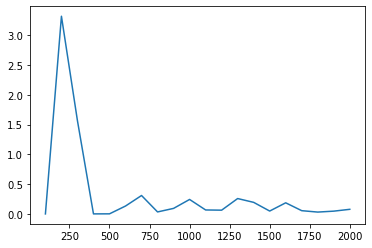

In [71]:
import matplotlib.pyplot as plt
y_plot_ = [i[0][0] for i in y_plot]
plt.plot(x_plot, y_plot_)

### Entrenamiento estocástico y por bloques

In [94]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
batch_size = 25

In [97]:
x_vals = np.random.normal(1.,.1,200)
y_vals = np.repeat(10.,200)

In [98]:
x_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1,1]))

In [99]:
my_pred = tf.matmul(x_data, A)

In [100]:
loss = tf.reduce_mean(tf.square(my_pred-y_target))

In [101]:
my_op = tf.train.GradientDescentOptimizer(learning_rate=0.025)
train_step = my_op.minimize(loss)

In [103]:
init = tf.global_variables_initializer()

In [104]:
session.run(init)

In [105]:
loss_batch = []
for i in range(200):
    rand_index  = np.random.choice(200, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if((i+1)%5==0):
        print("Paso #"+str(i+1)+" A= " + str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print("Loss: " + str(temp_loss))
        loss_batch.append(temp_loss)

Paso #5 A= [[1.5063461]]
Loss: 71.84914
Paso #10 A= [[3.430008]]
Loss: 42.849907
Paso #15 A= [[4.905997]]
Loss: 25.91264
Paso #20 A= [[6.044809]]
Loss: 15.096284
Paso #25 A= [[6.9242277]]
Loss: 10.098492
Paso #30 A= [[7.609862]]
Loss: 6.464039
Paso #35 A= [[8.13101]]
Loss: 4.7469115
Paso #40 A= [[8.527574]]
Loss: 2.3340194
Paso #45 A= [[8.849944]]
Loss: 2.2096627
Paso #50 A= [[9.091916]]
Loss: 1.4849313
Paso #55 A= [[9.273289]]
Loss: 1.3777957
Paso #60 A= [[9.403254]]
Loss: 1.1762334
Paso #65 A= [[9.523606]]
Loss: 1.4813544
Paso #70 A= [[9.604657]]
Loss: 1.4464177
Paso #75 A= [[9.669778]]
Loss: 0.8391789
Paso #80 A= [[9.714605]]
Loss: 1.0098946
Paso #85 A= [[9.770978]]
Loss: 1.2041374
Paso #90 A= [[9.810205]]
Loss: 0.9332936
Paso #95 A= [[9.819281]]
Loss: 1.2233287
Paso #100 A= [[9.842834]]
Loss: 0.9759754
Paso #105 A= [[9.8659]]
Loss: 1.2219889
Paso #110 A= [[9.863509]]
Loss: 0.98378456
Paso #115 A= [[9.865958]]
Loss: 1.0951376
Paso #120 A= [[9.884556]]
Loss: 0.97610307
Paso #125 A= [

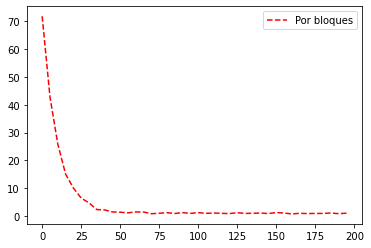

In [107]:
plt.plot(range(0,200,5),loss_batch, 'r--', label = 'Por bloques')
plt.legend(loc= 'upper right', prop = {'size': 10})
plt.show()

### Clasificación de la _Iris Setosa_

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

#### Carga de datos

In [37]:
iris = datasets.load_iris()
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

#### Declarar variables

In [38]:
batch_size = 20
x1_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)

#### Crear el modelo
$$ x_2 = Ax_1+b \Rightarrow x_2-Ax_1-b = 0 $$

In [47]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [48]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_pred = tf.subtract(x1_data, my_add)

#### Función de pérdidas y propagación hacia atrás

In [49]:
xentr = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_pred, labels = y_target)
my_op = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train_step = my_op.minimize(xentr)

#### Inicializar variables

In [50]:
init = tf.global_variables_initializer()
session.run(init)

#### Entrenar

In [51]:
for i in range(1000):
    rand_idx = np.random.choice(len(iris_2d), size = batch_size)
    rand_x = iris_2d[rand_idx]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_idx]]) 
    session.run(train_step, feed_dict = {x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if(i+1)%100==0:
        print("Paso # " + str(i+1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)))
    

Paso # 100, A = [[7.276183]], b = [[-2.4950957]]
Paso # 200, A = [[8.66152]], b = [[-3.519854]]
Paso # 300, A = [[9.501581]], b = [[-4.2252026]]
Paso # 400, A = [[10.16071]], b = [[-4.664791]]
Paso # 500, A = [[10.678926]], b = [[-5.026338]]
Paso # 600, A = [[11.016813]], b = [[-5.504225]]
Paso # 700, A = [[11.490419]], b = [[-5.6469975]]
Paso # 800, A = [[11.845481]], b = [[-5.911754]]
Paso # 900, A = [[12.115455]], b = [[-6.16979]]
Paso # 1000, A = [[12.365904]], b = [[-6.4241776]]


#### Modelo final

In [55]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(slope, intercept)

12.365904 -6.4241776


#### Representación de la separación

In [56]:
x = np.linspace(0,3,num = 100)
abline_values = []
for i in x:
    abline_values.append(slope*i+intercept)

setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]

no_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
no_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]

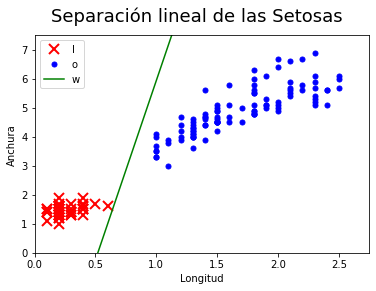

In [60]:
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew = 2, label = 'Setosa')
plt.plot(no_setosa_x, no_setosa_y, 'bo', ms=5, mew = 1, label = 'No Setosa')
plt.plot(x, abline_values, 'g-')
plt.suptitle('Separación lineal de las Setosas', fontsize = 18)
plt.xlabel('Longitud')
plt.ylabel('Anchura')
plt.legend('lowe right')
plt.xlim([0,2.75])
plt.ylim([0,7.5])
plt.show()

## Evaluación del Modelo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

### Regresión

In [2]:
x_vals = np.random.normal(1.0,0.1, 200)
y_vals = np.repeat(10.0, 200)
x_data = tf.placeholder(shape=[None,1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)

batch_size = 25

In [6]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace = False)
train_idx

array([146, 103, 150, 167,   9,  45, 198, 149, 133,  99,  31,  14, 190,
       142, 119,  13,  87,  72, 104,  57,  56,  12, 145, 187,  28, 155,
        48, 114,  73,  22,  58, 107, 162, 140, 148,  29,  75, 127, 128,
       157,  81, 122,  19, 144,  18, 194,  91,  78, 156, 185,  21, 168,
       108, 135, 138,  94,  55, 166,  96,  38,   8,  62,  67, 174, 129,
       139,  26, 106,  39,  59,  37, 110, 132, 124,  15, 196,  83,  92,
        60, 177,  74,   2,   7,  54, 191, 100, 131, 165,  68,  61,  33,
        65,  70,  80, 136,   6, 118, 123,  25, 182,  50, 161, 101,  86,
       193,  10, 134, 152,  34, 164, 175, 169,   1, 120, 117,  98, 141,
         4, 186,  11,  42,  52, 143,  53,  66,  82, 197, 160,  17, 159,
       176,  97, 151, 158,   5,  84,  89, 181,  76, 121, 180, 184, 163,
        64,  41,  46, 179, 171,  90,  69, 130,  35, 199,  43,  32, 153,
        30,  79,   0,  95])

In [8]:
test_idx = np.array(list(set(range(len(x_vals))) - set(train_idx)))
test_idx

array([  3, 137,  16, 147,  20,  23,  24, 154,  27,  36,  40, 170,  44,
       172, 173,  47,  49, 178,  51, 183, 188, 189,  63, 192, 195,  71,
        77,  85,  88,  93, 102, 105, 109, 111, 112, 113, 115, 116, 125,
       126])

In [9]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(shape = [1,1]))

In [10]:
my_pred = tf.matmul(x_data, A)
loss  =tf.reduce_mean(tf.square(my_pred-y_target))
my_op = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_op.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [11]:
for i in range(200):
    rand_idx = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if(i+1)%20==0:
        print("Paso #" + str(i+1) + ", A = "+ str(session.run(A)) + ", Loss = "+ str(session.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})))
    

Paso #20, A = [[5.7593985]], Loss = 18.124714
Paso #40, A = [[8.062215]], Loss = 3.626819
Paso #60, A = [[9.03498]], Loss = 1.8428885
Paso #80, A = [[9.543892]], Loss = 1.1446106
Paso #100, A = [[9.689448]], Loss = 0.821218
Paso #120, A = [[9.733817]], Loss = 0.8399858
Paso #140, A = [[9.787558]], Loss = 0.73039824
Paso #160, A = [[9.783765]], Loss = 0.85844666
Paso #180, A = [[9.805853]], Loss = 1.1175141
Paso #200, A = [[9.822312]], Loss = 0.695012


In [15]:
mse_train = session.run(loss, feed_dict = {x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
mse_test = session.run(loss, feed_dict = {x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
print("MSE-train = "+str(np.round(mse_train,3)) + ", MSE-test = "+str(np.round(mse_test,3)))

MSE-train = 0.946, MSE-test = 1.279


### Caso de clasificación

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [137]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(2,1,100)))
y_vals = np.concatenate((np.repeat(0.0,100), np.repeat(1.0,100)))

x_data = tf.placeholder(shape=[1,None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1,None], dtype=tf.float32)

In [138]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [139]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [140]:
my_pred = tf.add(x_data, A)
init = tf.global_variables_initializer()
session.run(init)

In [141]:
#xent = tf.reduce_mean(tf.square(my_pred-y_target))

xent = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = my_pred, labels=y_target))

my_op = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_op.minimize(xent)

In [142]:
for i in range(3000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_idx]]
    rand_y = [y_vals_train[rand_idx]]
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = " + str(session.run(A))+ " Loss = " + str(session.run(xent, feed_dict = {x_data: rand_x, y_target: rand_y})))

Paso #100, A = [7.0082927] Loss = 2.809758
Paso #200, A = [4.7182612] Loss = 0.9148165
Paso #300, A = [2.7843838] Loss = 0.5716534
Paso #400, A = [1.622321] Loss = 0.3541697
Paso #500, A = [0.9524054] Loss = 0.18489693
Paso #600, A = [0.5793805] Loss = 0.20944874
Paso #700, A = [0.3823745] Loss = 0.2204057
Paso #800, A = [0.27267134] Loss = 0.13635539
Paso #900, A = [0.22997649] Loss = 0.23840302
Paso #1000, A = [0.17809907] Loss = 0.16578032
Paso #1100, A = [0.15962327] Loss = 0.15748248
Paso #1200, A = [0.132749] Loss = 0.16487613
Paso #1300, A = [0.1315685] Loss = 0.1778322
Paso #1400, A = [0.10691766] Loss = 0.19420767
Paso #1500, A = [0.11331959] Loss = 0.10808584
Paso #1600, A = [0.12989064] Loss = 0.19752617
Paso #1700, A = [0.11362207] Loss = 0.13253735
Paso #1800, A = [0.13881314] Loss = 0.21512292
Paso #1900, A = [0.11324728] Loss = 0.16836406
Paso #2000, A = [0.12035376] Loss = 0.13404444
Paso #2100, A = [0.13518798] Loss = 0.19867207
Paso #2200, A = [0.11793561] Loss = 0.16

#### Evaluar el modelo con la precisión (Accuracy)

In [143]:
y_pred = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_pred = tf.equal(y_pred, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [144]:
acc_train = session.run(accuracy, feed_dict={x_data:[x_vals_train], y_target:[y_vals_train]})
acc_test = session.run(accuracy, feed_dict={x_data:[x_vals_test], y_target:[y_vals_test]})

In [145]:
print("Precisión en el conjunto de entrenamiento " + str(acc_train))
print("Precisión en el conjunto de testing " + str(acc_test))

Precisión en el conjunto de entrenamiento 1.0
Precisión en el conjunto de testing 0.975


#### Visualización de los modelos

In [146]:
A_result = session.run(A)
A_result

array([0.10547318], dtype=float32)

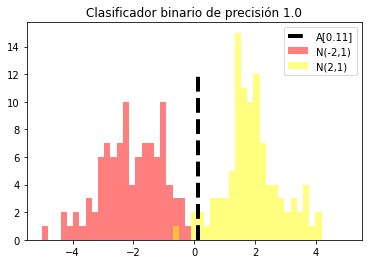

In [147]:
bins = np.linspace(-5,5,50)
plt.hist(x_vals[0:100], bins, alpha = 0.5, label = "N(-2,1)", color="red")
plt.hist(x_vals[100:200], bins, alpha = 0.5, label = "N(2,1)", color="yellow")
plt.plot((A_result, A_result),(0,12), "k--", linewidth=4, label="A"+str(np.round(A_result,2)))
plt.legend(loc="upper right")
plt.title("Clasificador binario de precisión "+ str(np.round(acc_train,2)))
plt.show()

# Algoritmos en Tensorflow

## Método de la matriz inversa para la regresión lineal

$$Ax=b$$
$$A^TAx=A^Tb$$
$$x = (A^TA)^{-1}A^Tb$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

In [2]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

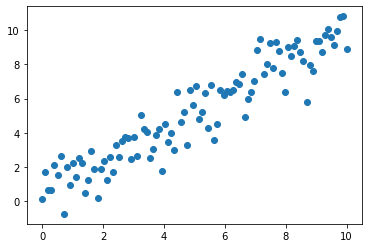

In [3]:
plt.plot(x_vals, y_vals, 'o', label = 'Datos')

In [7]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [8]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [9]:
tA_A = tf.matmul(tf.transpose(A_tensor), A)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A))
solution = tf.matmul(product, b_tensor)
solution_eval = session.run(solution)

In [10]:
solution_eval

array([[0.95842785],
       [0.41570329]])

In [12]:
slope = solution_eval[0][0]
intercept = solution_eval[1][0]
print(str(np.round(slope,3))+"x + "+str(np.round(intercept,3)))

0.958x + 0.416


In [13]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

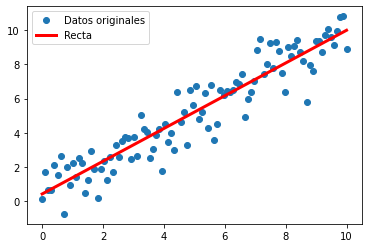

In [14]:
plt.plot(x_vals, y_vals, 'o', label = 'Datos originales')
plt.plot(x_vals, best_fit, 'r-', label = 'Recta', linewidth = 3)
plt.legend(loc = "upper left")
plt.show()

## Método de la descomposición Cholesky

$$A = LU$$
- $L$: matriz triangular superior
- $U$: matriz triangular inferior
- $L^T=U$

$$Ax=b$$
$$LUx=b$$

$$Ly=b$$
$$Ux=y$$

$$A^TAx=A^Tb$$
$$LUx=A^Tb$$

$$Ly=A^Tb$$
$$Ux=y$$

In [26]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [27]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [28]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)
y_sol = tf.matrix_solve(L, tA_b)
x_sol = tf.matrix_solve(tf.transpose(L), y_sol)

In [29]:
sol_eval = session.run(x_sol)

In [30]:
sol_eval

array([[0.95842785],
       [0.41570329]])

In [31]:
slope = sol_eval[0][0]
intercept = sol_eval[1][0]
print(str(np.round(slope,3))+"x + "+str(np.round(intercept,3)))

0.958x + 0.416


In [32]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

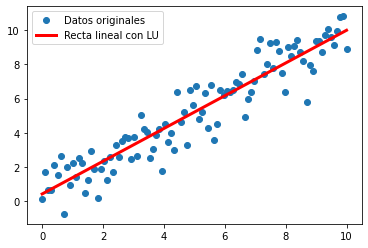

In [35]:
plt.plot(x_vals, y_vals, 'o', label = 'Datos originales')
plt.plot(x_vals, best_fit, 'r-', label = 'Recta lineal con LU', linewidth = 3)
plt.legend(loc = "upper left")
plt.show()

## Predicción del sepalo en función del pétalo 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
session = tf.Session()

In [4]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

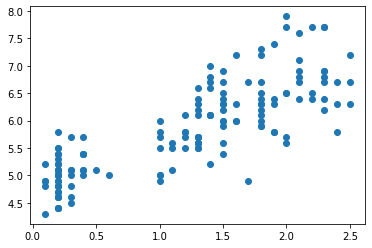

In [6]:
plt.plot(x_vals, y_vals, 'o', label = 'Datos')

In [9]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A  =tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

$$y =xA + b$$

In [12]:
y_pred = tf.add(tf.matmul(x_data,A), b)

In [13]:
loss = tf.reduce_mean(tf.square(y_target-y_pred))
my_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_op.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [14]:
loss_vect = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+" , A = "+str(session.run(A)) + ", b" + str(session.run(b)) + ", Loss=" + str(temp_loss))

Paso #10 , A = [[1.4143312]], b[[3.594135]], Loss=0.5687883
Paso #20 , A = [[1.4252671]], b[[3.8965347]], Loss=0.5107976
Paso #30 , A = [[1.3755598]], b[[4.0562468]], Loss=0.30874157
Paso #40 , A = [[1.297702]], b[[4.1901755]], Loss=0.3815204
Paso #50 , A = [[1.2046072]], b[[4.2921896]], Loss=0.2847607
Paso #60 , A = [[1.1652489]], b[[4.3728356]], Loss=0.29158977
Paso #70 , A = [[1.0788436]], b[[4.466317]], Loss=0.4509829
Paso #80 , A = [[1.0600923]], b[[4.527892]], Loss=0.24098732
Paso #90 , A = [[1.0584934]], b[[4.577918]], Loss=0.17136258
Paso #100 , A = [[0.98180467]], b[[4.5881643]], Loss=0.21306072


In [17]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(slope)+"x+"+str(intercept))

0.98180467x+4.5881643


In [18]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

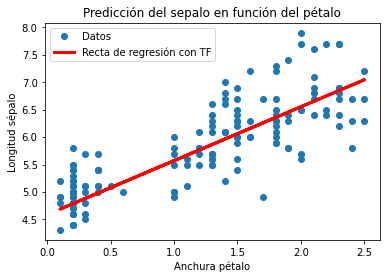

In [19]:
plt.plot(x_vals, y_vals, 'o', label = 'Datos')
plt.plot(x_vals, best_fit, 'r-', label = 'Recta de regresión con TF', linewidth = 3)
plt.legend(loc="upper left")
plt.title("Predicción del sepalo en función del pétalo")
plt.xlabel('Anchura pétalo')
plt.ylabel('Longitud sépalo')
plt.show()

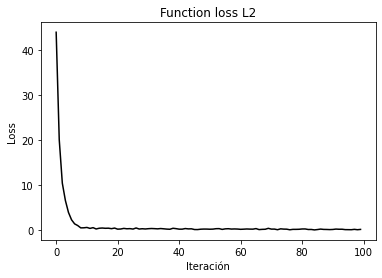

In [20]:
plt.plot(loss_vect, 'k-')
plt.title('Function loss L2')
plt.xlabel('Iteración')
plt.ylabel('Loss')
plt.show()

In [21]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [22]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A  =tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

In [23]:
y_pred = tf.add(tf.matmul(x_data,A), b)

In [25]:
loss_l1 = tf.reduce_mean(tf.abs(y_target-y_pred))
my_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_op.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [27]:
loss_vect_l1 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+" , A = "+str(session.run(A)) + ", b" + str(session.run(b)) + ", Loss=" + str(temp_loss))

Paso #10 , A = [[-0.80208844]], b[[2.2058773]], Loss=4.2795033
Paso #20 , A = [[-0.15948841]], b[[2.7058768]], Loss=3.4863899
Paso #30 , A = [[0.4337116]], b[[3.2058764]], Loss=2.055594
Paso #40 , A = [[1.0229117]], b[[3.7058759]], Loss=1.0243833
Paso #50 , A = [[1.2823116]], b[[4.037876]], Loss=0.5532041
Paso #60 , A = [[1.2423116]], b[[4.193876]], Loss=0.40316117
Paso #70 , A = [[1.1801114]], b[[4.2858763]], Loss=0.4229973
Paso #80 , A = [[1.1569114]], b[[4.385876]], Loss=0.44485033
Paso #90 , A = [[1.0837114]], b[[4.4378757]], Loss=0.32488334
Paso #100 , A = [[1.0741115]], b[[4.5178766]], Loss=0.3822013


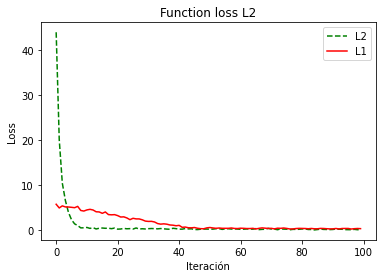

In [31]:
plt.plot(loss_vect, 'g--', label='L2')
plt.plot(loss_vect_l1, 'r-', label = 'L1')
plt.title('Function loss L2')
plt.xlabel('Iteración')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

## Regresión de la distancia ortogonal (Deming)

$$\sqrt{(x_r-x_p)^2+(y_r-y_p)^2}$$

$$d=\frac{|y_0-(mx_0+b)|}{\sqrt{m^2+1}}$$

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn import datasets
ops.reset_default_graph()
session = tf.Session()

In [24]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [25]:
batch_size = 50
learning_rate = 0.05

In [26]:
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
m  =tf.Variable(tf.random_normal(shape = [1,1]))
n = tf.Variable(tf.random_normal(shape = [1,1]))

In [27]:
y_pred = tf.add(tf.matmul(x_data,m), n)

In [28]:
deming_num = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data,m),n)))
deming_den = tf.sqrt(tf.add(tf.square(m), 1.0))
deming_loss = tf.reduce_mean(tf.truediv(deming_num,deming_den))

In [29]:
init = tf.global_variables_initializer()
session.run(init)

In [30]:
my_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_op.minimize(deming_loss)

In [31]:
loss_vect = []
for i in range(300):
    rand_idx=np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(deming_loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if(i+1)%20==0:
        print("Paso #"+str(i+1)+" , m = "+str(session.run(m)) + ", n" + str(session.run(n)) + ", Loss=" + str(temp_loss))

Paso #20 , m = [[2.0239065]], n[[0.08399189]], Loss=1.4105613
Paso #40 , m = [[2.8032844]], n[[0.44274354]], Loss=0.61523855
Paso #60 , m = [[3.1268685]], n[[0.64679974]], Loss=0.53125846
Paso #80 , m = [[3.2912135]], n[[0.77542007]], Loss=0.52652067
Paso #100 , m = [[3.4107883]], n[[0.88301104]], Loss=0.6107067
Paso #120 , m = [[3.4844604]], n[[0.9660493]], Loss=0.5375205
Paso #140 , m = [[3.51678]], n[[1.0226355]], Loss=0.4856131
Paso #160 , m = [[3.5335233]], n[[1.0706731]], Loss=0.53084624
Paso #180 , m = [[3.5400088]], n[[1.109316]], Loss=0.4930195
Paso #200 , m = [[3.525473]], n[[1.1327318]], Loss=0.44725168
Paso #220 , m = [[3.5132997]], n[[1.1595408]], Loss=0.45891562
Paso #240 , m = [[3.4909332]], n[[1.1787412]], Loss=0.55557686
Paso #260 , m = [[3.4925518]], n[[1.2156513]], Loss=0.5410214
Paso #280 , m = [[3.4832582]], n[[1.2453972]], Loss=0.45042405
Paso #300 , m = [[3.4660244]], n[[1.2691982]], Loss=0.5100841


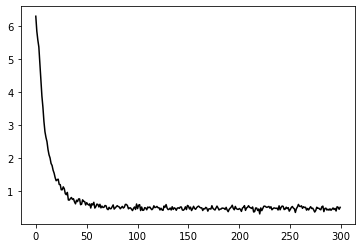

In [35]:
plt.plot(loss_vect, 'k-')

In [32]:
[[slope]] = session.run(m)
[[intercept]] = session.run(n)
print(str(slope)+"x+"+str(intercept))

3.4660244x+1.2691982


In [33]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

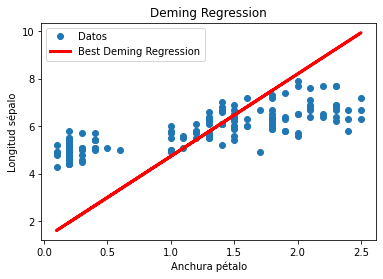

In [34]:
plt.plot(x_vals, y_vals, 'o', label = 'Datos')
plt.plot(x_vals, best_fit, 'r-', label = 'Best Deming Regression', linewidth = 3)
plt.legend(loc="upper left")
plt.title("Deming Regression")
plt.xlabel('Anchura pétalo')
plt.ylabel('Longitud sépalo')
plt.show()

## Regresión Lasso y Ridge

$$y=Ax+b$$

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [120]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [121]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [122]:
batch_size = 50
learning_rate = 0.001

In [123]:
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A  =tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

In [124]:
y_pred = tf.add(tf.matmul(x_data, A), b)

$$\sum\frac{(y_r-y_p)^2}{n}+\frac{99.0}{1+e^{-100(A-0.9)}}$$

In [125]:
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1.0, tf.add(1.0, tf.exp(tf.multiply(-100.0, tf.subtract(A,lasso_param)))))
regularization_params = tf.multiply(heavyside_step, 99.)
loss = tf.add(tf.reduce_mean(tf.square(y_target-y_pred)), regularization_params)

In [126]:
init = tf.global_variables_initializer()
session.run(init)

In [127]:
my_op =tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_op.minimize(loss)

In [128]:
loss_vect = []
for i in range(2000):
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss[0])
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+" , A = "+str(session.run(A)) + ", b" + str(session.run(b)) + ", Loss=" + str(temp_loss))
    

Paso #20 , A = [[1.5803019]], b[[-2.16311]], Loss=[[139.32045]]
Paso #40 , A = [[1.8152936]], b[[-1.9199061]], Loss=[[133.61116]]
Paso #60 , A = [[2.025326]], b[[-1.6953441]], Loss=[[128.89163]]
Paso #80 , A = [[2.212766]], b[[-1.4877206]], Loss=[[124.98576]]
Paso #100 , A = [[2.3797588]], b[[-1.2954909]], Loss=[[121.748924]]
Paso #120 , A = [[2.528248]], b[[-1.117255]], Loss=[[119.06227]]
Paso #140 , A = [[2.6599956]], b[[-0.9517431]], Loss=[[116.828156]]
Paso #160 , A = [[2.776597]], b[[-0.79780453]], Loss=[[114.96635]]
Paso #180 , A = [[2.8794997]], b[[-0.6543954]], Loss=[[113.410934]]
Paso #200 , A = [[2.970014]], b[[-0.5205691]], Loss=[[112.10776]]
Paso #220 , A = [[3.0493283]], b[[-0.39546758]], Loss=[[111.01229]]
Paso #240 , A = [[3.1185179]], b[[-0.2783125]], Loss=[[110.08798]]
Paso #260 , A = [[3.178558]], b[[-0.16839813]], Loss=[[109.30477]]
Paso #280 , A = [[3.2303333]], b[[-0.06508438]], Loss=[[108.63795]]
Paso #300 , A = [[3.2746441]], b[[0.03220934]], Loss=[[108.067215]]


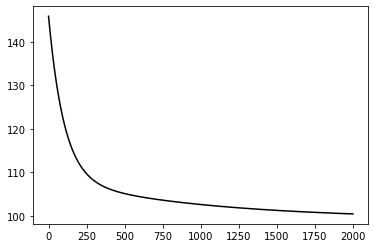

In [129]:
plt.plot(loss_vect, 'k-')

In [131]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(slope)+"x+"+str(intercept))

2.2487037x+3.004361


In [133]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

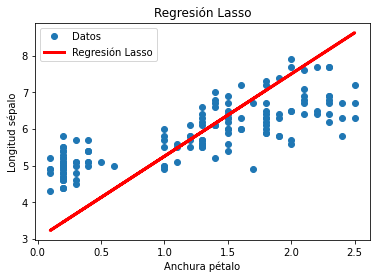

In [135]:
plt.plot(x_vals, y_vals, 'o', label = 'Datos')
plt.plot(x_vals, best_fit, 'r-', label = 'Regresión Lasso', linewidth = 3)
plt.legend(loc="upper left")
plt.title("Regresión Lasso")
plt.xlabel('Anchura pétalo')
plt.ylabel('Longitud sépalo')
plt.show()

### Regresión Ridge

$$ \sum\frac{(y_r-y_p)^2}{n}+ridge_p\cdot A^2 $$

In [ ]:
ridge_params = tf.constant(1.0)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dm(tf.add(tf.reduce_mean(tf.square(y_target-y_pred)), tf.multiply(ridge_params, ridge_loss)), 0)

## Regresión Elastic Net

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
session = tf.Session()
iris = datasets.load_iris()

In [12]:
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [4]:
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [3,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
y_pred = tf.add(tf.matmul(x_data,A), b)

$$ L oss = \sum\frac{(y_r-y_p)^2}{n}+\alpha\cdot |A|+\beta \cdot A^2$$

In [5]:
elastic_param1= tf.constant(1.0)
elastic_param2= tf.constant(1.0)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target-y_pred)),e1_term),e2_term), 0)

In [6]:
init = tf.global_variables_initializer()
session.run(init)

In [7]:
my_op =tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_op.minimize(loss)

In [15]:
loss_vect = []
for i in range(3000):
    rand_idx=np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss[0])
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+" , A = "+str(session.run(A)) + ", b" + str(session.run(b)) + ", Loss=" + str(temp_loss))

Paso #100 , A = [[ 0.9462526 ]
 [ 0.7938127 ]
 [-0.41585106]], b[[0.30617365]], Loss=[1.4680917]
Paso #200 , A = [[ 0.9473378 ]
 [ 0.76242584]
 [-0.3490259 ]], b[[0.33897182]], Loss=[1.435359]
Paso #300 , A = [[ 0.9479238 ]
 [ 0.73352295]
 [-0.2866098 ]], b[[0.37177303]], Loss=[1.4247701]
Paso #400 , A = [[ 0.9470455 ]
 [ 0.70842564]
 [-0.22800659]], b[[0.40410528]], Loss=[1.2806906]
Paso #500 , A = [[ 0.9442485 ]
 [ 0.68364257]
 [-0.17381555]], b[[0.43602425]], Loss=[1.2509228]
Paso #600 , A = [[ 0.9424077 ]
 [ 0.6638068 ]
 [-0.12228829]], b[[0.46815306]], Loss=[1.1502471]
Paso #700 , A = [[ 0.9370415]
 [ 0.6388035]
 [-0.0767718]], b[[0.49892774]], Loss=[1.1631699]
Paso #800 , A = [[ 0.9370286 ]
 [ 0.621681  ]
 [-0.03235064]], b[[0.53130704]], Loss=[1.1220392]
Paso #900 , A = [[9.3381709e-01]
 [6.0626870e-01]
 [2.5479257e-04]], b[[0.5628266]], Loss=[1.0637021]
Paso #1000 , A = [[9.3240756e-01]
 [5.9475124e-01]
 [4.9178640e-04]], b[[0.59465957]], Loss=[1.1245265]
Paso #1100 , A = [[9.3

In [20]:
[[x1],[x2],[x3]] = session.run(A)
[[intercept]] = session.run(b)
print(str(x1)+"x1+"+str(x2)+"x2+"+str(x3)+"x3+"+str(intercept))

0.8065182x1+0.5490768x2+-5.0433016e-05x3+1.1800882


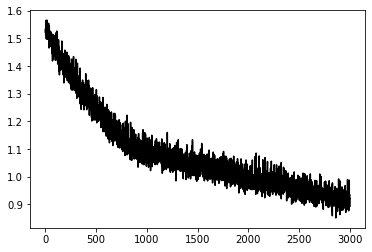

In [21]:
plt.plot(loss_vect, 'k-')

## Regresión Logística

In [38]:
import requests
url = 'https://raw.githubusercontent.com/joanby/tensorflow/master/datasets/birthweight.dat'
birth_file = requests.get(url)
birth_data = birth_file.text.split('\r\n')
birth_data

['LOW\tAGE\tLWT\tRACE\tSMOKE\tPTL\tHT\tUI\tBWT',
 '1\t28\t113\t1\t1\t1\t0\t1\t709',
 '1\t29\t130\t0\t0\t0\t0\t1\t1021',
 '1\t34\t187\t1\t1\t0\t1\t0\t1135',
 '1\t25\t105\t1\t0\t1\t1\t0\t1330',
 '1\t25\t85\t1\t0\t0\t0\t1\t1474',
 '1\t27\t150\t1\t0\t0\t0\t0\t1588',
 '1\t23\t97\t1\t0\t0\t0\t1\t1588',
 '1\t24\t128\t1\t0\t1\t0\t0\t1701',
 '1\t24\t132\t1\t0\t0\t1\t0\t1729',
 '1\t21\t165\t0\t1\t0\t1\t0\t1790',
 '1\t32\t105\t1\t1\t0\t0\t0\t1818',
 '1\t19\t91\t0\t1\t1\t0\t1\t1885',
 '1\t25\t115\t1\t0\t0\t0\t0\t1893',
 '1\t16\t130\t1\t0\t0\t0\t0\t1899',
 '1\t25\t92\t0\t1\t0\t0\t0\t1928',
 '1\t20\t150\t0\t1\t0\t0\t0\t1928',
 '1\t21\t190\t1\t0\t0\t0\t1\t1928',
 '1\t24\t155\t0\t1\t1\t0\t0\t1936',
 '1\t21\t103\t1\t0\t0\t0\t0\t1970',
 '1\t20\t125\t1\t0\t0\t0\t1\t2055',
 '1\t25\t89\t1\t0\t1\t0\t0\t2055',
 '1\t19\t102\t0\t0\t0\t0\t0\t2082',
 '1\t19\t112\t0\t1\t0\t0\t1\t2084',
 '1\t26\t117\t0\t1\t1\t0\t1\t2084',
 '1\t24\t138\t0\t0\t0\t0\t0\t2100',
 '1\t17\t130\t1\t1\t1\t0\t1\t2125',
 '1\t20\t120\t1\t1\t0

In [39]:
birth_header = birth_data[0].split('\t')
birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
birth_data

[[1.0, 28.0, 113.0, 1.0, 1.0, 1.0, 0.0, 1.0, 709.0],
 [1.0, 29.0, 130.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1021.0],
 [1.0, 34.0, 187.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1135.0],
 [1.0, 25.0, 105.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1330.0],
 [1.0, 25.0, 85.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1474.0],
 [1.0, 27.0, 150.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1588.0],
 [1.0, 23.0, 97.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1588.0],
 [1.0, 24.0, 128.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1701.0],
 [1.0, 24.0, 132.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1729.0],
 [1.0, 21.0, 165.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1790.0],
 [1.0, 32.0, 105.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1818.0],
 [1.0, 19.0, 91.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1885.0],
 [1.0, 25.0, 115.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1893.0],
 [1.0, 16.0, 130.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1899.0],
 [1.0, 25.0, 92.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [1.0, 20.0, 150.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [1.0, 21.0, 190.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1928.0],
 [1.0, 24.0, 155.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1936.0],
 [1.0, 21.0, 103.0, 1.0, 0.0, 0.0

In [15]:
import os.path
import csv

birthweight_filename = './datasets/birthweight.csv'
if not os.path.exists(birthweight_filename):
    with open(birthweight_filename,'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(birth_header)
        writer.writerows(birth_data)
        f.close()

In [40]:
birth_data=[]
birth_header=[]
birthweight_filename = './datasets/birthweight.csv'
if os.path.exists(birthweight_filename):
    with open(birthweight_filename, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        birth_header=next(csv_reader)
        for row in csv_reader:
            birth_data.append(row)
birth_data

[['1.0', '28.0', '113.0', '1.0', '1.0', '1.0', '0.0', '1.0', '709.0'],
 ['1.0', '29.0', '130.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1021.0'],
 ['1.0', '34.0', '187.0', '1.0', '1.0', '0.0', '1.0', '0.0', '1135.0'],
 ['1.0', '25.0', '105.0', '1.0', '0.0', '1.0', '1.0', '0.0', '1330.0'],
 ['1.0', '25.0', '85.0', '1.0', '0.0', '0.0', '0.0', '1.0', '1474.0'],
 ['1.0', '27.0', '150.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1588.0'],
 ['1.0', '23.0', '97.0', '1.0', '0.0', '0.0', '0.0', '1.0', '1588.0'],
 ['1.0', '24.0', '128.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1701.0'],
 ['1.0', '24.0', '132.0', '1.0', '0.0', '0.0', '1.0', '0.0', '1729.0'],
 ['1.0', '21.0', '165.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1790.0'],
 ['1.0', '32.0', '105.0', '1.0', '1.0', '0.0', '0.0', '0.0', '1818.0'],
 ['1.0', '19.0', '91.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1885.0'],
 ['1.0', '25.0', '115.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1893.0'],
 ['1.0', '16.0', '130.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1899.0

In [17]:
birth_header

['LOW', 'AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'BWT']

In [41]:
birth_data = [[float(x) for x in row] for row in birth_data]
birth_data[0]

[1.0, 28.0, 113.0, 1.0, 1.0, 1.0, 0.0, 1.0, 709.0]

In [42]:
y_vals = np.array([x[0] for x in birth_data])
x_vals = np.array([x[1:8] for x in birth_data])

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import normalize
session = tf.Session()

### Dividir sets

In [43]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [44]:
x_vals_train = x_vals[train_idx]
y_vals_train = y_vals[train_idx]

x_vals_test = x_vals[test_idx]
y_vals_test = y_vals[test_idx]

### Normalización

In [45]:
def normalize_cols(m, col_min = np.array([None]), col_max = np.array([None])):
    if not col_min[0]:
        col_min = m.min(axis = 0)
    if not col_max[0]:
        col_max = m.max(axis = 0)
    return (m-col_min)/(col_max-col_min), col_min, col_max

In [46]:
x_vals_train, train_min, train_max = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_train[0]

array([0.58064516, 0.12121212, 1.        , 1.        , 0.        ,
       0.        , 0.        ])

In [47]:
train_min

array([14., 85.,  0.,  0.,  0.,  0.,  0.])

In [48]:
train_max

array([ 45., 250.,   1.,   1.,   1.,   1.,   1.])

In [49]:
x_vals_test,_,_ = np.nan_to_num(normalize_cols(x_vals_test, col_min = train_min, col_max = train_max))
x_vals_test[0]

array([0.35483871, 0.12121212, 1.        , 0.        , 1.        ,
       1.        , 0.        ])

### Modelo de regresión logística

- $x \in \mathbb R^7$
- $A \in \mathbb R_{7\times 1}$
- $b \in \mathbb R$
- $y = Ax+b \in \mathbb R$
- $\hat{y} = sigmoid(y) \in (0,1) $

In [28]:
batch_size = 25
x_data = tf.placeholder(shape=[None, 7], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[7,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
y_pred = tf.add(tf.matmul(x_data,A), b)

In [30]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = y_pred, labels = y_target))
init = tf.global_variables_initializer()
session.run(init)
my_op = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = my_op.minimize(loss)

In [31]:
y_hat = tf.round(tf.sigmoid(y_pred))
y_real = tf.cast(tf.equal(y_hat, y_target), tf.float32)
accuracy = tf.reduce_mean(y_real)

In [50]:
loss_vect = []
train_acc = []
test_acc = []
for i in range(3000):
    rand_idx=np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    temp_acc_train = session.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = session.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+" Loss=" + str(temp_loss))

Paso #100 Loss=1.0844388
Paso #200 Loss=0.97749525
Paso #300 Loss=0.6911521
Paso #400 Loss=0.67595285
Paso #500 Loss=0.7815903
Paso #600 Loss=0.6989631
Paso #700 Loss=0.6935614
Paso #800 Loss=0.69426864
Paso #900 Loss=0.72167504
Paso #1000 Loss=0.83208543
Paso #1100 Loss=0.79074854
Paso #1200 Loss=0.69268805
Paso #1300 Loss=0.68396866
Paso #1400 Loss=0.7091095
Paso #1500 Loss=0.7755966
Paso #1600 Loss=0.6302902
Paso #1700 Loss=0.6114192
Paso #1800 Loss=0.49722728
Paso #1900 Loss=0.7202255
Paso #2000 Loss=0.79498404


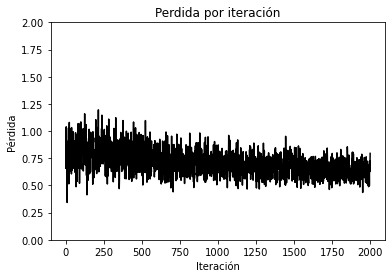

In [52]:
plt.plot(loss_vect, 'k-')
plt.title('Perdida por iteración')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.ylim([0,2])
plt.show()

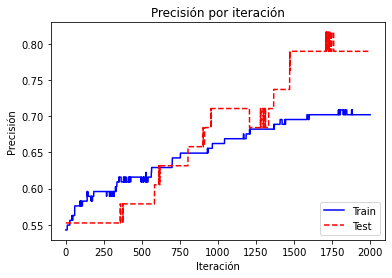

In [55]:
plt.plot(train_acc, 'b-', label = 'Train')
plt.plot(test_acc, 'r--', label = 'Test')
plt.title('Precisión por iteración')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

## Support Vector Machines

### SVM Lineal

$$\frac{1}{n}\sum_{i=1}^n\max(0,1-y_i(Ax_i-b))+\alpha||A||^2$$

- $A$: vector de pendientes
- $b$: intercept
- $x=(x_1,x_2,\cdots, x_n)$ es el vector de datos
- $y_i$ es la clase del objeto (-1 o 1)
- $\alpha$: coeficiente de regularización y suvizado en la separación

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [120]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])

In [121]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=True)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [122]:
batch_size = 100
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [123]:
output = tf.subtract(tf.matmul(x_data,A), b)

In [124]:
l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1., tf.multiply(output, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [125]:
pred = tf.sign(output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y_target), tf.float32))

In [126]:
my_op = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = my_op.minimize(loss)

In [127]:
init = tf.global_variables_initializer()
session.run(init)

In [128]:
loss_vect = []
train_acc = []
test_acc = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    temp_train_acc = session.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(temp_train_acc)
    temp_train_acc = session.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(temp_train_acc)
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+",b = "+str(session.run(b))+", Loss=" + str(temp_loss))

Paso #100, A = [[-0.1090294 ]
 [ 0.03294068]],b = [[0.35427475]], Loss=[0.79423875]
Paso #200, A = [[-0.01155614]
 [-0.3675121 ]],b = [[0.26877475]], Loss=[0.57101965]
Paso #300, A = [[ 0.06562563]
 [-0.6776428 ]],b = [[0.1795747]], Loss=[0.55103904]
Paso #400, A = [[ 0.11978079]
 [-0.9235221 ]],b = [[0.09337471]], Loss=[0.52269477]
Paso #500, A = [[ 0.1809775]
 [-1.127547 ]],b = [[0.00247471]], Loss=[0.4315207]
Paso #600, A = [[ 0.20250681]
 [-1.294972  ]],b = [[-0.0832253]], Loss=[0.42365032]
Paso #700, A = [[ 0.20309927]
 [-1.3763943 ]],b = [[-0.15612532]], Loss=[0.43563423]
Paso #800, A = [[ 0.2019554]
 [-1.4028013]],b = [[-0.22282526]], Loss=[0.3534572]
Paso #900, A = [[ 0.19461739]
 [-1.4105294 ]],b = [[-0.2844253]], Loss=[0.33105066]
Paso #1000, A = [[ 0.17859618]
 [-1.4152346 ]],b = [[-0.34262532]], Loss=[0.3418332]


In [129]:
[[a1],[a2]] = session.run(A)
[[b1]] = session.run(b)
slope = -a2/a1
y_intercept = b1/a1
x1_vals = [d[1] for d in x_vals]

In [130]:
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

In [131]:
setosa_x = [d[1] for i ,d in enumerate(x_vals) if y_vals[i]==1]
setosa_y = [d[0] for i ,d in enumerate(x_vals) if y_vals[i]==1]
no_setosa_x = [d[1] for i ,d in enumerate(x_vals) if y_vals[i]==-1]
no_setosa_y = [d[0] for i ,d in enumerate(x_vals) if y_vals[i]==-1]

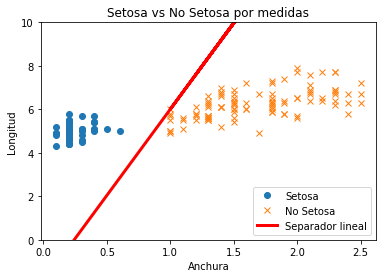

In [132]:
plt.plot(setosa_x, setosa_y, 'o', label = 'Setosa')
plt.plot(no_setosa_x, no_setosa_y, 'x', label = 'No Setosa')
plt.plot(x1_vals, best_fit, 'r-', label = 'Separador lineal', linewidth = 3)
plt.ylim([0,10])
plt.legend(loc='lower right')
plt.ylabel('Longitud')
plt.xlabel('Anchura')
plt.title('Setosa vs No Setosa por medidas')
plt.show()

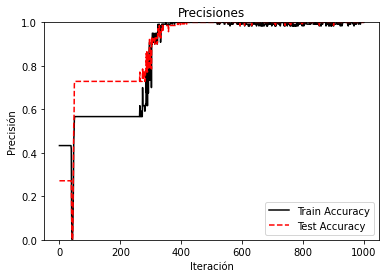

In [135]:
plt.plot(train_acc, 'k-', label = 'Train Accuracy')
plt.plot(test_acc, 'r--', label = 'Test Accuracy')
plt.title('Precisiones')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.legend(loc = 'lower right')
plt.ylim([0,1])
plt.show()

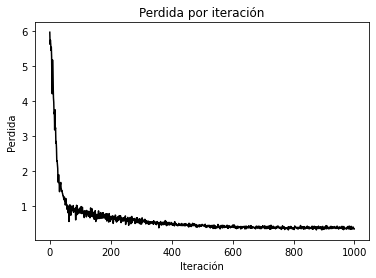

In [137]:
plt.plot(loss_vect, 'k-')
plt.title('Perdida por iteración')
plt.xlabel('Iteración')
plt.ylabel('Perdida')
plt.show()

### SVM para problemas de regresión

$$loss = \frac{1}{n}\sum_{i=1}^{n}\max(0, |y_i-(Ax_i+b)|) - \varepsilon$$

- $\varepsilon$ la mitad del margen, que fueza a que la función loss sea cero para todos los puntos dentro del corredor

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [3]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

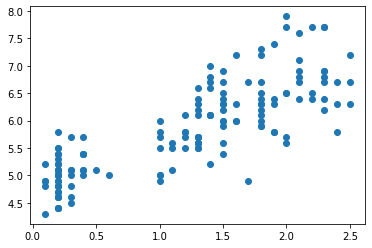

In [5]:
plt.plot(x_vals, y_vals, 'o')
plt.show()

In [6]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=True)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [7]:
batch_size = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [8]:
model_output = tf.add(tf.matmul(x_data,A), b)

In [11]:
epsilon = tf.constant([0.5])
loss = tf.reduce_mean(tf.maximum(0.0, tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))

In [13]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optim.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

In [14]:
train_loss = []
test_loss = []

for i in range(300):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    train_loss_temp = session.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
    train_loss.append(train_loss_temp)
    test_loss_temp = session.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
    test_loss.append(test_loss_temp)
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+",b = "+str(session.run(b)))
        print("Loss Train=" + str(train_loss_temp), "Loss Test=" + str(test_loss_temp))

Paso #50, A = [[1.6954526]],b = [[1.7741413]]
Loss Train=1.6025406 Loss Test=1.4750237
Paso #100, A = [[2.1553524]],b = [[2.8351407]]
Loss Train=0.47667712 Loss Test=0.545064
Paso #150, A = [[1.8761524]],b = [[3.4421399]]
Loss Train=0.3006597 Loss Test=0.35995072
Paso #200, A = [[1.5476531]],b = [[3.9291396]]
Loss Train=0.16351484 Loss Test=0.20521113
Paso #250, A = [[1.3377529]],b = [[4.2641397]]
Loss Train=0.102451734 Loss Test=0.1407917
Paso #300, A = [[1.2618526]],b = [[4.39714]]
Loss Train=0.093024254 Loss Test=0.12517986


In [18]:
[[slope]] = session.run(A)
[[y_intercept]] = session.run(b)
[width] = session.run(epsilon)

best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(width + slope*i+y_intercept)
    best_fit_lower.append(-width + slope*i+y_intercept)

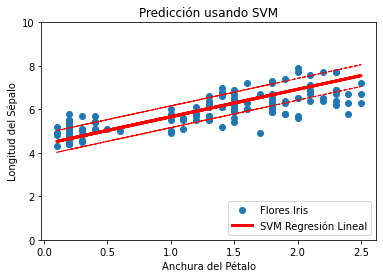

In [19]:
plt.plot(x_vals, y_vals, 'o', label = 'Flores Iris')
plt.plot(x_vals, best_fit, 'r-', label = 'SVM Regresión Lineal', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=1)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=1)
plt.ylim([0,10])
plt.legend(loc='lower right')
plt.ylabel('Longitud del Sépalo')
plt.xlabel('Anchura del Pétalo')
plt.title('Predicción usando SVM')
plt.show()

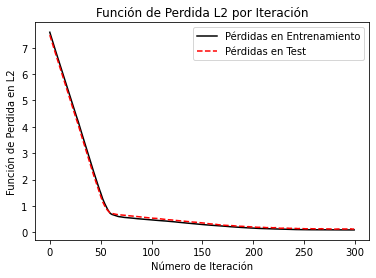

In [20]:
plt.plot(train_loss, 'k-', label='Pérdidas en Entrenamiento')
plt.plot(test_loss, 'r--', label='Pérdidas en Test')
plt.title('Función de Perdida L2 por Iteración')
plt.xlabel('Número de Iteración')
plt.ylabel('Función de Perdida en L2')
plt.legend(loc='upper right')
plt.show()

### Kernels - Núcleos de convolución no lineales

$$\max \left(\sum_{i=1}^n b_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n y_i b_i k(x_i, x_j) y_j b_j\right)$$

sujeto a las restricciones
$$\sum_{i=1}^n b_i y_i = 0$$
$$0\le b_i \le \frac{1}{2n\gamma}$$

- Caso lineal $k(x_i,x_j) = x_i\cdot x_j$
- Caso general $k(x_i, x_j) = \phi(x_i)\cdot\phi(x_j)$ 

   - Kernel Gaussiano: $k(x_i, x_j) = e^{-\gamma ||x_i-x_j||^2}$
   - Predicción: $k(x_i, p_j) = e^{-\gamma ||x_i-p_j||^2}$

- Kernel polinomial homogéneo: $k(x_i, x_j) = (x_i\cdot x_j)^d$
- Kernel polinomial no homogéneo: $k(x_i, x_j) = (x_i\cdot x_j + 1)^d$
- Kernel de tangente hiperbólica: $k(x_i, x_j) = tanh(a x_i\cdot x_j +k)$

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [24]:
ops.reset_default_graph()
session = tf.Session()

In [25]:
(x_vals, y_vals) = datasets.make_circles(n_samples = 500, factor=0.5, noise = 0.1)

In [26]:
x_vals

array([[-8.56720230e-01, -5.39786594e-01],
       [-5.13786405e-01, -1.78882418e-01],
       [ 2.91072575e-01, -1.77894184e-01],
       [ 8.95379237e-02,  7.27831419e-01],
       [ 1.81993062e-01, -5.32752203e-01],
       [-4.17381109e-01,  9.64045727e-03],
       [-9.80570149e-02,  6.00872491e-01],
       [ 7.09905830e-02, -7.44972827e-01],
       [-1.72243873e-01, -3.13733387e-01],
       [ 7.72730410e-01, -7.85171216e-01],
       [ 5.06734084e-01,  7.65991954e-03],
       [ 7.66017178e-01, -4.79314668e-01],
       [-5.42339988e-01, -8.06810252e-01],
       [-6.31268831e-01,  6.76192480e-01],
       [-5.90450608e-01, -1.05192943e+00],
       [ 1.03379626e+00, -3.42234882e-01],
       [-1.79733376e-01,  6.01350536e-01],
       [-1.15111591e-01,  4.31517292e-01],
       [-1.10781145e+00,  8.45727343e-02],
       [ 4.93799425e-01, -5.90193016e-02],
       [-3.10857468e-01, -3.34014456e-01],
       [-4.19741421e-01,  4.72314844e-01],
       [-7.55025132e-01, -6.30153844e-01],
       [ 4.

In [27]:
y_vals

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [28]:
y_vals = np.array([1 if y==1 else -1 for y in y_vals])

In [29]:
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==-1]

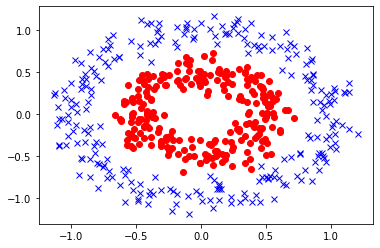

In [30]:
plt.plot(class1_x, class1_y, 'ro', label='Clase 1')
plt.plot(class2_x, class2_y, 'bx', label='Clase 2')
plt.show()

In [31]:
batch_size = 500
x_data = tf.placeholder(shape=[None, 2], dtype = tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype = tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [32]:
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1, 1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))

In [33]:
first_sum = tf.reduce_sum(b)
b_vect_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

In [34]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1), [-1,1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

In [35]:
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

In [36]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

In [37]:
my_op = tf.train.GradientDescentOptimizer(learning_rate=0.002)
train_step = my_op.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [38]:
loss_vect = []
batch_acc = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vect.append(temp_loss)
    acc_temp = session.run(accuracy, feed_dict={x_data:rand_x, y_target:rand_y, prediction_grid: rand_x})
    batch_acc.append(acc_temp)
    if(i+1)%50==0:
        print("Paso #" + str(i+1) + " ,Perdida = " + str(temp_loss) + ", Precisión = " + str(acc_temp))

Paso #50 ,Perdida = 329.01877, Precisión = 0.598
Paso #100 ,Perdida = 182.26645, Precisión = 0.54
Paso #150 ,Perdida = 142.65251, Precisión = 0.614
Paso #200 ,Perdida = 66.52542, Precisión = 0.72
Paso #250 ,Perdida = 40.928318, Precisión = 0.698
Paso #300 ,Perdida = 41.284546, Precisión = 0.734
Paso #350 ,Perdida = 17.453716, Precisión = 0.814
Paso #400 ,Perdida = 8.062613, Precisión = 0.862
Paso #450 ,Perdida = -2.939268, Precisión = 0.9
Paso #500 ,Perdida = -7.4057484, Precisión = 0.978
Paso #550 ,Perdida = -5.948797, Precisión = 0.966
Paso #600 ,Perdida = -6.2784595, Precisión = 0.928
Paso #650 ,Perdida = -9.991309, Precisión = 0.988
Paso #700 ,Perdida = -9.269114, Precisión = 0.992
Paso #750 ,Perdida = -10.986511, Precisión = 0.994
Paso #800 ,Perdida = -11.756046, Precisión = 0.99
Paso #850 ,Perdida = -10.730827, Precisión = 0.996
Paso #900 ,Perdida = -11.126369, Precisión = 0.992
Paso #950 ,Perdida = -12.370144, Precisión = 0.992
Paso #1000 ,Perdida = -12.393728, Precisión = 0.99


In [39]:
x_vals

array([[-8.56720230e-01, -5.39786594e-01],
       [-5.13786405e-01, -1.78882418e-01],
       [ 2.91072575e-01, -1.77894184e-01],
       [ 8.95379237e-02,  7.27831419e-01],
       [ 1.81993062e-01, -5.32752203e-01],
       [-4.17381109e-01,  9.64045727e-03],
       [-9.80570149e-02,  6.00872491e-01],
       [ 7.09905830e-02, -7.44972827e-01],
       [-1.72243873e-01, -3.13733387e-01],
       [ 7.72730410e-01, -7.85171216e-01],
       [ 5.06734084e-01,  7.65991954e-03],
       [ 7.66017178e-01, -4.79314668e-01],
       [-5.42339988e-01, -8.06810252e-01],
       [-6.31268831e-01,  6.76192480e-01],
       [-5.90450608e-01, -1.05192943e+00],
       [ 1.03379626e+00, -3.42234882e-01],
       [-1.79733376e-01,  6.01350536e-01],
       [-1.15111591e-01,  4.31517292e-01],
       [-1.10781145e+00,  8.45727343e-02],
       [ 4.93799425e-01, -5.90193016e-02],
       [-3.10857468e-01, -3.34014456e-01],
       [-4.19741421e-01,  4.72314844e-01],
       [-7.55025132e-01, -6.30153844e-01],
       [ 4.

In [40]:
x_min, x_max = x_vals[:, 0].min()-1, x_vals[:,0].max()+1
y_min, y_max = x_vals[:, 1].min()-1, x_vals[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_points= np.c_[xx.ravel(), yy.ravel()]
grid_points

array([[-2.13655523, -2.19040244],
       [-2.11655523, -2.19040244],
       [-2.09655523, -2.19040244],
       ...,
       [ 2.16344477,  2.14959756],
       [ 2.18344477,  2.14959756],
       [ 2.20344477,  2.14959756]])

In [41]:
[grid_predictions] = session.run(prediction, feed_dict={x_data: x_vals, y_target: np.transpose([y_vals]), prediction_grid: grid_points})
grid_predictions

array([-1., -1., -1., ..., -1., -1., -1.], dtype=float32)

In [42]:
grid_predictions = grid_predictions.reshape(xx.shape)

In [43]:
grid_predictions

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

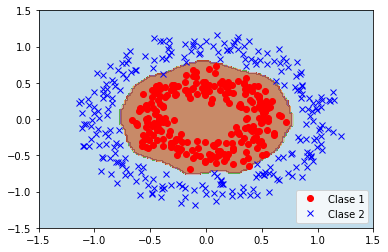

In [45]:
plt.contourf(xx,yy,grid_predictions, cmap = plt.cm.Paired, alpha=0.7)
plt.plot(class1_x, class1_y, 'ro', label='Clase 1')
plt.plot(class2_x, class2_y, 'bx', label='Clase 2')
plt.legend(loc='lower right')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

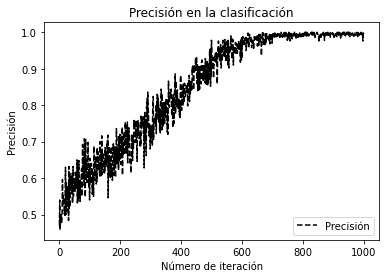

In [46]:
plt.plot(batch_acc, 'k--', label='Precisión')
plt.title('Precisión en la clasificación')
plt.xlabel('Número de iteración')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

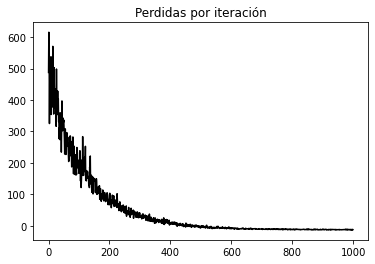

In [47]:
plt.plot(loss_vect, 'k-')
plt.title('Perdidas por iteración')
plt.show()

## Parámetros de un núcleo gaussiano

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [12]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [13]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])

class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == 1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == 1]
class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == -1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == -1]

In [14]:
batch_size = 150
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [15]:
gammas = [1.0, 10.0, 25.0, 100.0]

In [27]:
gamma = tf.constant(-0.85)

dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1, 1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))

first_sum = tf.reduce_sum(b)
b_vect_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1), [-1,1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

my_op = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = my_op.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

loss_vect = []
batch_acc = []
for i in range(400):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vect.append(temp_loss)
    acc_temp = session.run(accuracy, feed_dict={x_data:rand_x, y_target:rand_y, prediction_grid: rand_x})
    batch_acc.append(acc_temp)
    if(i+1)%50==0:
        print("Paso #" + str(i+1) + " ,Perdida = " + str(temp_loss) + ", Precisión = " + str(acc_temp))
        
x_min, x_max = x_vals[:, 0].min()-1, x_vals[:,0].max()+1
y_min, y_max = x_vals[:, 1].min()-1, x_vals[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_points= np.c_[xx.ravel(), yy.ravel()]
[grid_predictions] = session.run(prediction, feed_dict={x_data: x_vals, y_target: np.transpose([y_vals]), prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

Paso #50 ,Perdida = 9.519153, Precisión = 0.58666664
Paso #100 ,Perdida = 5.445769, Precisión = 0.8
Paso #150 ,Perdida = -0.115804195, Precisión = 0.96
Paso #200 ,Perdida = -0.9692036, Precisión = 0.96
Paso #250 ,Perdida = -1.2482613, Precisión = 0.96
Paso #300 ,Perdida = -0.9640437, Precisión = 0.96666664
Paso #350 ,Perdida = -0.87377065, Precisión = 0.9533333
Paso #400 ,Perdida = -1.0124, Precisión = 0.97333336


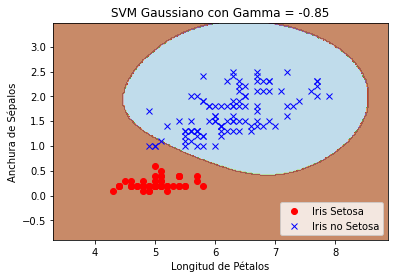

In [28]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.7)
plt.plot(class1_x, class1_y, 'ro', label='Iris Setosa')
plt.plot(class2_x, class2_y, 'bx', label='Iris no Setosa')
plt.title('SVM Gaussiano con Gamma = ' + str(session.run(gamma)))
plt.xlabel('Longitud de Pétalos')
plt.ylabel('Anchura de Sépalos')
plt.legend(loc='lower right')
plt.show()